# Convolución

Sumar dos señales juntas es una forma de combinar dos señales en una. 


19 5 27


<Figure size 432x288 with 0 Axes>

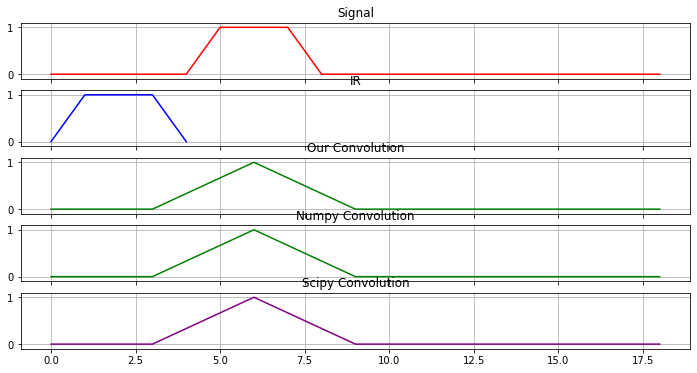

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline



def convolve1d(signal, ir):
    """
    we use the 'same' / 'constant' method for zero padding. 
    """
    n      = len(signal); 
    m      = len(ir);
    aux    = np.zeros(m-1)
    aux    = np.append(aux,signal)
    aux    = np.append(aux,np.zeros(m-1))
    print(n,m,len(aux))
    output = np.zeros(n+m+m-2)
    for i in range(m+n-1):
        output[i] = sum([aux[i  + j]*ir[m-j-1] for j in range(m)])
    return output[2:-m-1]


# create signal and IR
signal = [ 0, 0, 0,0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0]
ir     = [ 0, 3, 3,3,0]

# convolve, compare different methods
np_conv = np.convolve(signal, ir, mode='same')

convolution1d = convolve1d(signal, ir)

sconv = scipy.ndimage.convolve1d(signal, ir, mode='constant')

# plot them, scaling by the height
plt.clf()
fig, axs = plt.subplots(5, 1, figsize=(12, 6), sharey=True, sharex=True)

axs[0].plot(signal / np.max(signal), c='r')
axs[0].set_title('Signal')
axs[0].set_ylim(-.1, 1.1)
axs[0].grid()

axs[1].plot(ir / np.max(ir), c='b')
axs[1].set_title('IR')
axs[1].set_ylim(-.1, 1.1)
axs[1].grid()

axs[2].plot(convolution1d / np.max(convolution1d), c='g')
axs[2].set_title('Our Convolution')
axs[2].set_ylim(-.1, 1.1)
axs[2].grid()

axs[3].plot(np_conv / np.max(np_conv), c='g')
axs[3].set_title('Numpy Convolution')
axs[3].set_ylim(-.1, 1.1)
axs[3].grid()

axs[4].plot(sconv / np.max(sconv), c='purple')
axs[4].set_title('Scipy Convolution')
axs[4].set_ylim(-.1, 1.1)
axs[4].grid()
plt.show()